<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/final_project_Analytics_Vidya%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data=pd.read_csv('churn_prediction.csv')

In [20]:
data.head(20)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0.0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0.0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0.0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0.0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0.0


In [21]:
data.shape

(8693, 21)

In [22]:
data.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
gender                            157
dependents                        729
occupation                         25
city                              252
customer_nw_category                0
branch_code                         0
days_since_last_transaction       986
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       1
average_monthly_balance_prevQ2      1
current_month_credit                1
previous_month_credit               1
current_month_debit                 1
previous_month_debit                1
current_month_balance               1
previous_month_balance              1
churn                               1
dtype: int64

In [23]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                             float64
dtype: object

In [24]:
data.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9263,5413,67,Male,0.0,self_employed,1020.0,1,1,0.0,2046.92,1899.61,5104.78,12367.98,21429.06,0.49,149.34,777.79,1856.55,1225.41,0.0
8689,9264,3188,54,Male,0.0,self_employed,905.0,2,1336,NaN,1571.50,1571.50,1571.50,1561.55,0.07,0.07,0.07,0.07,1571.50,1571.50,0.0
8690,9266,2964,40,Female,0.0,self_employed,834.0,2,40,28.0,1490.69,1.13,1966.66,1550.71,0.57,0.29,1910.07,564.14,2208.34,1.81,0.0
8691,9267,1687,42,Female,0.0,self_employed,17.0,2,181,24.0,50216.75,50013.18,49561.29,42804.08,203.61,0.04,0.04,0.04,50188.67,50012.83,0.0


In [0]:
data['gender'].fillna(data['gender'].mode()[0],inplace=True)
data['dependents'].fillna(data['dependents'].mode()[0],inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)
data['city'].fillna(data['city'].mode()[0],inplace=True)
data['days_since_last_transaction'].fillna(data['days_since_last_transaction'].mean(),inplace=True)

In [26]:
data.isnull()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
data=data.dropna()

In [28]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [29]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                             float64
dtype: object

In [30]:
data['occupation'].value_counts()

self_employed    5341
salaried         2044
retired           649
student           648
company            10
Name: occupation, dtype: int64

In [31]:
data['gender'].value_counts()

Male      5257
Female    3435
Name: gender, dtype: int64

In [32]:
data['regular_income_category']=0
for i in range(len(data)):
  if data['occupation'][i]=='self_employed' or data['occupation'][i]=='student':
    data['regular_income_category'][i]='regular'
  else:
    data['regular_income_category'][i]='irregular'  
     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
data['increment_in_debit']=data['current_month_debit']-data['previous_month_debit']
data['increment_in_credit']=data['current_month_credit']-data['previous_month_credit']
data['increment_in_balance']=data['current_month_balance']-data['previous_month_balance']
data['diff_credit_debit_current_month']=data['current_month_credit']-data['current_month_debit']
data['diff_credit_debit_previous_month']=data['previous_month_credit']-data['previous_month_debit']

In [34]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,regular_income_category,increment_in_debit,increment_in_credit,increment_in_balance,diff_credit_debit_current_month,diff_credit_debit_previous_month
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0,regular,0.00,0.00,0.00,0.00,0.00
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0,regular,5385.71,0.00,-2290.83,-5485.71,-100.00
2,4,2356,31,Male,0.0,salaried,146.0,2,41,69.271052,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0,irregular,5787.50,0.00,-63.86,-6046.12,-258.62
3,5,478,90,Male,0.0,self_employed,1020.0,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0,regular,-2142.86,0.00,622.12,0.00,-2142.86
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0,regular,-949.44,-714.28,-520.01,-588.29,-823.45


In [35]:
data.shape

(8692, 27)

In [0]:
data=pd.get_dummies(data.drop(['customer_id'],axis=1))

In [37]:
data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,increment_in_debit,increment_in_credit,increment_in_balance,diff_credit_debit_current_month,diff_credit_debit_previous_month,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,regular_income_category_irregular,regular_income_category_regular
0,3135,66,0.0,187.0,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,1,0,0,1
1,310,35,0.0,1020.0,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0,5385.71,0.00,-2290.83,-5485.71,-100.00,0,1,0,0,0,1,0,0,1
2,2356,31,0.0,146.0,2,41,69.271052,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0,5787.50,0.00,-63.86,-6046.12,-258.62,0,1,0,0,1,0,0,1,0
3,478,90,0.0,1020.0,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0,-2142.86,0.00,622.12,0.00,-2142.86,0,1,0,0,0,1,0,0,1
4,2531,42,2.0,1494.0,3,388,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0,-949.44,-714.28,-520.01,-588.29,-823.45,0,1,0,0,0,1,0,0,1


In [38]:
data.shape

(8692, 32)

In [0]:
x=data.drop(['churn'],axis=1)

In [0]:
y=data['churn']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred=clf.predict(x_test)


In [44]:
s1=clf.score(x_train,y_train)
s2=clf.score(x_test,y_test)
s1,s2

(1.0, 0.8559595029912563)

In [0]:
score_train=[]
score_test=[]
for i in range(5,25):
  clf=RandomForestClassifier(max_depth=i)
  clf.fit(x_train,y_train)
  score_train.append(clf.score(x_train,y_train))
  score_test.append(clf.score(x_test,y_test))

In [0]:
score=pd.DataFrame({'k':range(5,25),'score_train':score_train,'score_test':score_test})

No handles with labels found to put in legend.


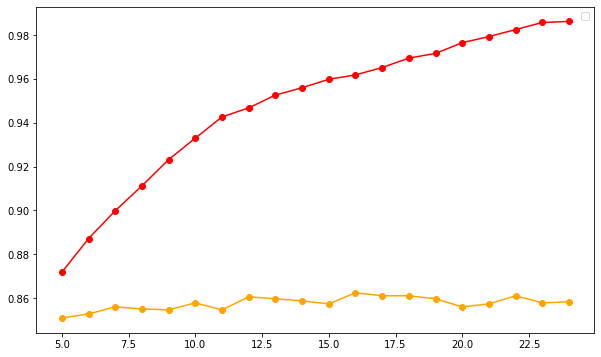

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(score['k'],score['score_train'],marker='o',color='red')
plt.plot(score['k'],score['score_test'],marker='o',color='orange')
plt.x_label=['max_depth']
plt.y_label=['performance']
plt.legend()

In [0]:
score_train=[]
score_test=[]
for i in range(2,25):
  clf=RandomForestClassifier(max_depth=16,min_samples_split=i)
  clf.fit(x_train,y_train)
  score_train.append(clf.score(x_train,y_train))
  score_test.append(clf.score(x_test,y_test))

In [0]:
score=pd.DataFrame({'k':range(2,25),'score_train':score_train,'score_test':score_test})

No handles with labels found to put in legend.


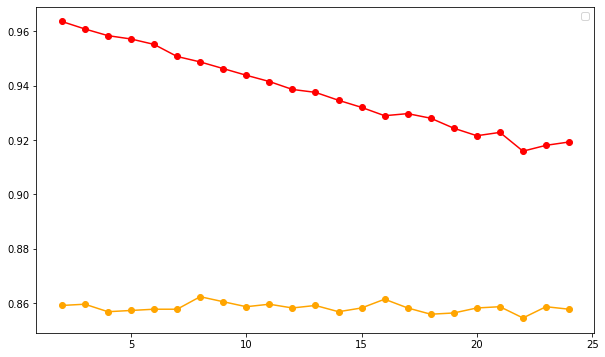

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(score['k'],score['score_train'],marker='o',color='red')
plt.plot(score['k'],score['score_test'],marker='o',color='orange')
plt.xlabel=['min_samples_split']
plt.ylabel=['performance']
plt.legend()

In [0]:
score_train=[]
score_test=[]
for i in range(70,100):
  clf=RandomForestClassifier(max_depth=13,min_samples_split=8,max_leaf_nodes=i)
  clf.fit(x_train,y_train)
  score_train.append(clf.score(x_train,y_train))
  score_test.append(clf.score(x_test,y_test))

In [0]:
score=pd.DataFrame({'k':range(70,100),'score_train':score_train,'score_test':score_test})

No handles with labels found to put in legend.


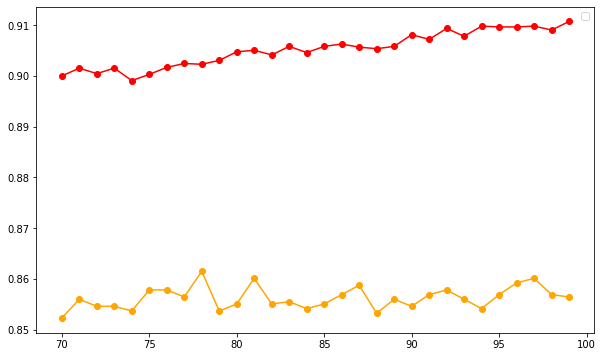

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(score['k'],score['score_train'],marker='o',color='red')
plt.plot(score['k'],score['score_test'],marker='o',color='orange')
plt.ylabel=['performance']
plt.xlabel=['max_leaf_nodes']
plt.legend()

In [0]:
score_train=[]
score_test=[]
for i in range(1,30):
  clf=RandomForestClassifier(max_depth=13,min_samples_split=7,min_samples_leaf=i,max_leaf_nodes=78)
  clf.fit(x_train,y_train)
  score_train.append(clf.score(x_train,y_train))
  score_test.append(clf.score(x_test,y_test))

In [0]:
score=pd.DataFrame({'k':range(1,30),'score_train':score_train,'score_test':score_test})

No handles with labels found to put in legend.


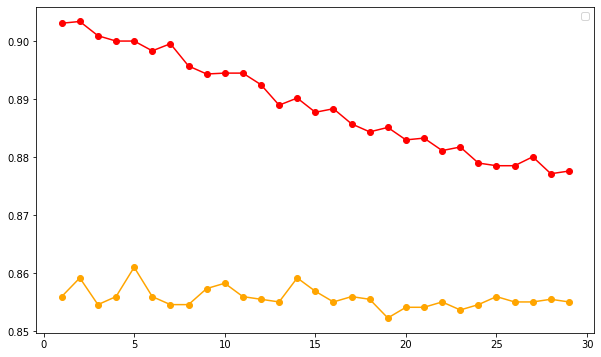

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(score['k'],score['score_train'],marker='o',color='red')
plt.plot(score['k'],score['score_test'],marker='o',color='orange')
plt.xlabel=['min_samples_leaf']
plt.ylabel=['performance']
plt.legend()

In [86]:
clf=RandomForestClassifier(max_depth=13,min_samples_split=7,min_samples_leaf=5,max_leaf_nodes=54)
clf.fit(x_train,y_train)
score_train=clf.score(x_train,y_train)
score_test=clf.score(x_test,y_test)
score_train,score_test

(0.8913943856419696, 0.8582604693971468)